In [1]:
import numpy as np
import matplotlib.pyplot as plt
tf = 30.00
dt = 0.05
t = np.arange(0,tf,dt)

#6,28 Rad/s Resposta

In [2]:
Ke = Kt = 0.01
J = 0.01
b = 0.019
R = 1
L = 0.5

<h1>Questão 1</h1>
Letra A

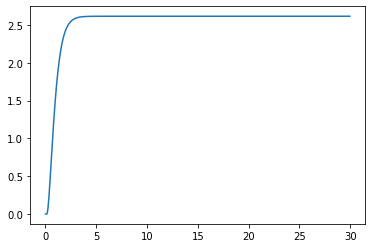

In [3]:
V= 5.0
Tp=np.zeros(np.size(t))
Tpp=np.zeros(np.size(t))
i=np.zeros(np.size(t))
ip=np.zeros(np.size(t))
for k in range(0, (np.size(t)-1)):
    Tpp[k+1]=(1/J)*(Ke*i[k]-b*Tp[k])
    Tp[k+1]=Tp[k]+Tpp[k]*dt

    ip[k+1]=(1/L)*(V-R*i[k]-Kt*Tp[k])
    i[k+1]=i[k]+ip[k]*dt
plt.plot(t,Tp)

<h1>Questão 1</h1>
Letra B

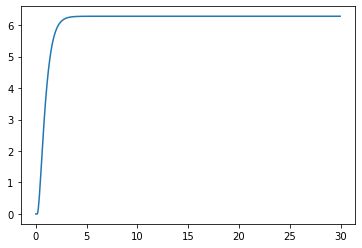

In [4]:
V= 12.0
Tp=np.zeros(np.size(t))
Tpp=np.zeros(np.size(t))
i=np.zeros(np.size(t))
ip=np.zeros(np.size(t))
for k in range(0, (np.size(t)-1)):
    Tpp[k+1]=(1/J)*(Ke*i[k]-b*Tp[k])
    Tp[k+1]=Tp[k]+Tpp[k]*dt

    ip[k+1]=(1/L)*(V-R*i[k]-Kt*Tp[k])
    i[k+1]=i[k]+ip[k]*dt
plt.plot(t,Tp)

Não é possivel exigir 3 $\pi rad/s$ pois a velocidade máxima é de  2 $\pi rad/s$

# **Questão 2**
 * A resposta não é instantânea.
 * Aproximadamene 10s.
 * Pode-se usar tecnicas como PWM chaveando pontes H ou outros circuitos de acionamento de potência.

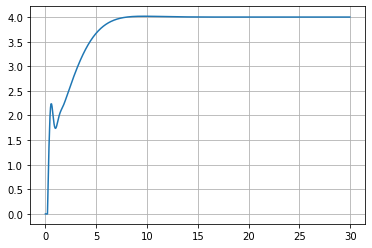

In [5]:
Kp=1.0
Ki=1
Kd=1.1
Sp=4.0
V= 0.0
erro=0.0
erro_old=0
erro_int=0

Tp=np.zeros(np.size(t))
Tpp=np.zeros(np.size(t))
i=np.zeros(np.size(t))
ip=np.zeros(np.size(t))
for k in range(0, (np.size(t)-1)):
    Tpp[k+1]=(1/J)*(Ke*i[k]-b*Tp[k])
    Tp[k+1]=Tp[k]+Tpp[k]*dt

    erro=Sp-Tp[k]
    ip[k+1]=(1/L)*(V-R*i[k]-Kt*Tp[k])
    i[k+1]=i[k]+ip[k]*dt
    V=erro*Kp+erro_int*Ki+((erro-erro_old)/dt)*Kd
    erro_old=erro
    erro_int+=erro*dt
plt.plot(t,Tp)
plt.grid()

# **Questão 3**

2.857142857142857 2.857142857142857


IndexError: index 600 is out of bounds for axis 0 with size 600

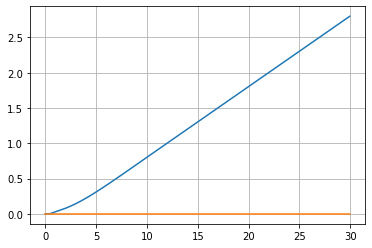

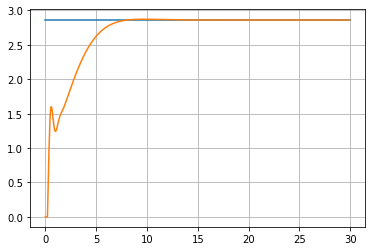

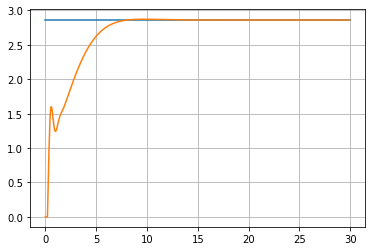

In [6]:
#Parametros do robo
u=0.1
w=0.0
R2=0.035
L2=0.28

#Parametros do motor
Ke = Kt = 0.01
J = 0.01
b = 0.019
R = 1
L = 0.5

#Velocidades das rodas
wd=(2*u+w*L2)/(2*R2)
we=(2*u-w*L2)/(2*R2)

#parametros do PID
Kp=1.0
Ki=1
Kd=1.1
Sp_d=wd
Sp_e=we
print(Sp_d,Sp_e)
V_d= 0.0
V_e= 0.0
erro_d=0.0
erro_e=0.0
erro_old_d=0
erro_old_e=0
erro_int_d=0
erro_int_e=0

Tp_d=np.zeros(np.size(t))
Tp_e=np.zeros(np.size(t))
Tpp_d=np.zeros(np.size(t))
Tpp_e=np.zeros(np.size(t))
i_d=np.zeros(np.size(t))
i_e=np.zeros(np.size(t))
ip_d=np.zeros(np.size(t))
ip_e=np.zeros(np.size(t))
sp_v_d=Sp_d*np.ones(np.size(t))
sp_v_e=Sp_e*np.ones(np.size(t))


x=np.zeros(np.size(t))
xp=np.zeros(np.size(t))
y=np.zeros(np.size(t))
yp=np.zeros(np.size(t))
f=np.zeros(np.size(t))
fp=np.zeros(np.size(t))


for k in range(0, (np.size(t)-1)):
    Tpp_d[k+1]=(1/J)*(Ke*i_d[k]-b*Tp_d[k])
    Tpp_e[k+1]=(1/J)*(Ke*i_e[k]-b*Tp_e[k])
    Tp_d[k+1]=Tp_d[k]+Tpp_d[k]*dt
    Tp_e[k+1]=Tp_e[k]+Tpp_e[k]*dt
    erro_d=Sp_d-Tp_d[k]
    erro_e=Sp_e-Tp_e[k]
    ip_d[k+1]=(1/L)*(V_d-R*i_d[k]-Kt*Tp_d[k])
    ip_e[k+1]=(1/L)*(V_e-R*i_e[k]-Kt*Tp_e[k])
    i_d[k+1]=i_d[k]+ip_d[k]*dt
    i_e[k+1]=i_e[k]+ip_e[k]*dt
    V_d=erro_d*Kp+erro_int_d*Ki+((erro_d-erro_old_d)/dt)*Kd
    V_e=erro_e*Kp+erro_int_e*Ki+((erro_e-erro_old_e)/dt)*Kd
    erro_old_d=erro_d
    erro_old_e=erro_e
    erro_int_d+=erro_d*dt
    erro_int_e+=erro_e*dt
    xp[k+1]=(R2/2)*(Tp_e[k]+Tp_d[k])*np.cos(f[k])
    yp[k+1]=(R2/2)*(Tp_e[k]+Tp_d[k])*np.sin(f[k])
    fp[k+1]=(R2/L2)*(Tp_d[k]-Tp_e[k])
    
    x[k+1]=x[k]+xp[k]*dt
    y[k+1]=y[k]+yp[k]*dt
    f[k+1]=f[k]+fp[k]*dt



plt.plot(t,x, t,y)
plt.grid()
plt.figure()
plt.plot(t,sp_v_d, t,Tp_d)
plt.grid()
plt.figure()
plt.plot(t,sp_v_e, t,Tp_e)
plt.grid()

print(x[600])

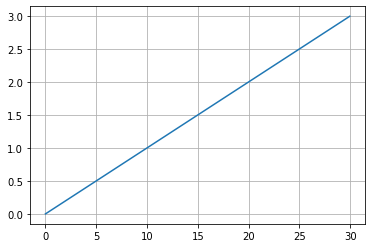

In [ ]:
u=0.1

pos_x=np.zeros(np.size(t))
for k in range(0,(np.size(t)-1)):
    pos_x[k+1]=pos_x[k]+u*dt
plt.plot(t,pos_x)
plt.grid()


# **Questão 4**

 * A) Sim é possível exigir u=0,1m/s e w=0,1rad/s
 * B) Não é possível, pois exige 6,54 rad/s da roda direita, e o máximo é de 6,28 rad/s
 * C) w_max=(w_d * 2*R-2*u)/L $\newline$
      w_max=0,856 rad-s


3.257142857142857 2.4571428571428573
0.8565106125091824


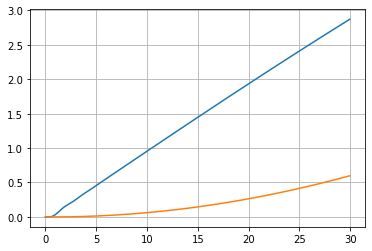

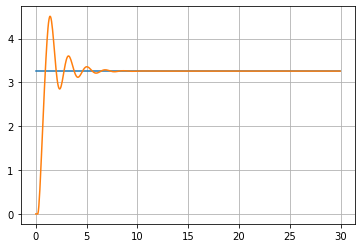

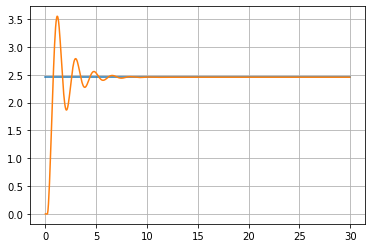

In [ ]:
#Parametros do robo
u=0.1
w=0.85
R2=0.035
L2=0.28

#Parametros do motor
Ke = Kt = 0.01
J = 0.01
b = 0.019
R = 1
L = 0.5

#Velocidades das rodas
wd=(2*u+w*L2)/(2*R2)
we=(2*u-w*L2)/(2*R2)

#parametros do PID
Kp=1.0
Ki=1
Kd=1.1
Sp_d=wd
Sp_e=we
print(Sp_d,Sp_e)
V_bat=12
V_d= 0.0
V_e= 0.0
erro_d=0.0
erro_e=0.0
erro_old_d=0
erro_old_e=0
erro_int_d=0
erro_int_e=0

Tp_d=np.zeros(np.size(t))
Tp_e=np.zeros(np.size(t))
Tpp_d=np.zeros(np.size(t))
Tpp_e=np.zeros(np.size(t))
i_d=np.zeros(np.size(t))
i_e=np.zeros(np.size(t))
ip_d=np.zeros(np.size(t))
ip_e=np.zeros(np.size(t))
sp_v_d=Sp_d*np.ones(np.size(t))
sp_v_e=Sp_e*np.ones(np.size(t))


x=np.zeros(np.size(t))
xp=np.zeros(np.size(t))
y=np.zeros(np.size(t))
yp=np.zeros(np.size(t))
f=np.zeros(np.size(t))
fp=np.zeros(np.size(t))


for k in range(0, (np.size(t)-1)):
    Tpp_d[k+1]=(1/J)*(Ke*i_d[k]-b*Tp_d[k])
    Tpp_e[k+1]=(1/J)*(Ke*i_e[k]-b*Tp_e[k])
    Tp_d[k+1]=Tp_d[k]+Tpp_d[k]*dt
    Tp_e[k+1]=Tp_e[k]+Tpp_e[k]*dt
    erro_d=Sp_d-Tp_d[k]
    erro_e=Sp_e-Tp_e[k]
    ip_d[k+1]=(1/L)*(V_d-R*i_d[k]-Kt*Tp_d[k])
    ip_e[k+1]=(1/L)*(V_e-R*i_e[k]-Kt*Tp_e[k])
    i_d[k+1]=i_d[k]+ip_d[k]*dt
    i_e[k+1]=i_e[k]+ip_e[k]*dt
    V_d=erro_d*Kp+erro_int_d*Ki+((erro_d-erro_old_d)/dt)*Kd
    V_e=erro_e*Kp+erro_int_e*Ki+((erro_e-erro_old_e)/dt)*Kd
    if V_d>V_bat:
        V_d=V_bat
    if V_e>V_bat:
        V_e=V_bat 
    erro_old_d=erro_d
    erro_old_e=erro_e
    erro_int_d+=erro_d*dt
    erro_int_e+=erro_e*dt
    xp[k+1]=(R2/2)*(Tp_e[k]+Tp_d[k])*np.cos(f[k])
    yp[k+1]=(R2/2)*(Tp_e[k]+Tp_d[k])*np.sin(f[k])
    fp[k+1]=(R2/2)*(Tp_d[k]-Tp_e[k])
    
    x[k+1]=x[k]+xp[k]*dt
    y[k+1]=y[k]+yp[k]*dt
    f[k+1]=f[k]+fp[k]*dt



plt.plot(t,x, t,y)
plt.grid()
plt.figure()
plt.plot(t,sp_v_d, t,Tp_d)
plt.grid()
plt.figure()
plt.plot(t,sp_v_e, t,Tp_e)
plt.grid()

w_max= (2*np.pi*2*R2-2*u)/L2
print(w_max)

## **Questão 5**

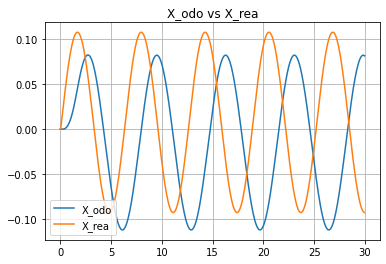

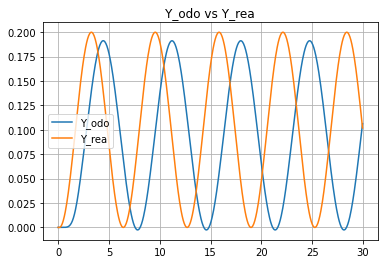

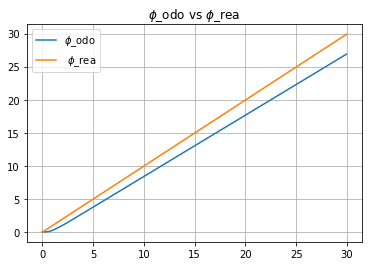

In [ ]:
#Parametros do robo
u=0.1
w=1.0
R2=0.035
L2=0.28

#Parametros do motor
Ke = Kt = 0.01
J = 0.01
b = 0.019
R = 1
L = 0.5

#Velocidades das rodas
wd=(2*u+w*L2)/(2*R2)
we=(2*u-w*L2)/(2*R2)

#parametros do PID
Kp=5.0
Ki=5
Kd=0.02
Sp_d=wd
Sp_e=we
V_bat=12
V_d= 0.0
V_e= 0.0
erro_d=0.0
erro_e=0.0
erro_old_d=0
erro_old_e=0
erro_int_d=0
erro_int_e=0

Tp_d=np.zeros(np.size(t))
Tp_e=np.zeros(np.size(t))
Tpp_d=np.zeros(np.size(t))
Tpp_e=np.zeros(np.size(t))
i_d=np.zeros(np.size(t))
i_e=np.zeros(np.size(t))
ip_d=np.zeros(np.size(t))
ip_e=np.zeros(np.size(t))
sp_v_d=Sp_d*np.ones(np.size(t))
sp_v_e=Sp_e*np.ones(np.size(t))


x_o=np.zeros(np.size(t))
x_r=np.zeros(np.size(t))
xp_o=np.zeros(np.size(t))
xp_r=np.zeros(np.size(t))
y_o=np.zeros(np.size(t))
y_r=np.zeros(np.size(t))
yp_o=np.zeros(np.size(t))
yp_r=np.zeros(np.size(t))
f_o=np.zeros(np.size(t))
f_r=np.zeros(np.size(t))
fp_o=np.zeros(np.size(t))
fp_r=np.zeros(np.size(t))


for k in range(0, (np.size(t)-1)):
    erro_d=Sp_d-Tp_d[k]
    erro_e=Sp_e-Tp_e[k]
    V_d=erro_d*Kp+erro_int_d*Ki+((erro_d-erro_old_d)/dt)*Kd
    V_e=erro_e*Kp+erro_int_e*Ki+((erro_e-erro_old_e)/dt)*Kd
    if V_d>V_bat:
        V_d=V_bat
    if V_e>V_bat:
        V_e=V_bat
    erro_old_d=erro_d
    erro_old_e=erro_e
    erro_int_d+=erro_d*dt
    erro_int_e+=erro_e*dt
    Tpp_d[k+1]=(1/J)*(Ke*i_d[k]-b*Tp_d[k])
    Tpp_e[k+1]=(1/J)*(Ke*i_e[k]-b*Tp_e[k])
    Tp_d[k+1]=Tp_d[k]+Tpp_d[k]*dt
    Tp_e[k+1]=Tp_e[k]+Tpp_e[k]*dt
    
    ip_d[k+1]=(1/L)*(V_d-R*i_d[k]-Kt*Tp_d[k])
    ip_e[k+1]=(1/L)*(V_e-R*i_e[k]-Kt*Tp_e[k])
    i_d[k+1]=i_d[k]+ip_d[k]*dt
    i_e[k+1]=i_e[k]+ip_e[k]*dt
    

    #parte da odometria
    xp_o[k+1]=(R2/2)*(Tp_e[k]+Tp_d[k])*np.cos(f_o[k])
    yp_o[k+1]=(R2/2)*(Tp_e[k]+Tp_d[k])*np.sin(f_o[k])
    fp_o[k+1]=(R2/L2)*(Tp_d[k]-Tp_e[k])

    x_o[k+1]=x_o[k]+xp_o[k]*dt
    y_o[k+1]=y_o[k]+yp_o[k]*dt
    f_o[k+1]=f_o[k]+fp_o[k]*dt

    #modelo uniciclo
    xp_r[k+1]=u*np.cos(f_r[k])
    yp_r[k+1]=u*np.sin(f_r[k])
    fp_r[k+1]=w

    x_r[k+1]=x_r[k]+xp_r[k]*dt
    y_r[k+1]=y_r[k]+yp_r[k]*dt
    f_r[k+1]=f_r[k]+fp_r[k]*dt


    



plt.plot(t,x_o,t,x_r )

plt.title('X_odo vs X_rea')
plt.legend(['X_odo', 'X_rea'])
plt.grid()
plt.figure()
plt.plot(t,y_o, t,y_r)
plt.title('Y_odo vs Y_rea')
plt.legend(['Y_odo', 'Y_rea'])
plt.grid()
plt.figure()
plt.plot(t,f_o, t,f_r)
plt.title('$\phi$_odo vs $\phi$_rea')
plt.legend(['$\phi$_odo',' $\phi$_rea'])
plt.grid()
# plt.figure()
# plt.plot(t,sp_v_d, t,Tp_d)
# plt.grid()
# plt.figure()
# plt.plot(t,sp_v_e, t,Tp_e)
# plt.grid()

* Houve divergência, o modelo por odometria é mais fiel à realidade, pois leva em conta os parâmetros físicos do robô.
* Parâmetros como modelagem do motor DC, diâmetro e espaçamento das rodas.

## Questão 6

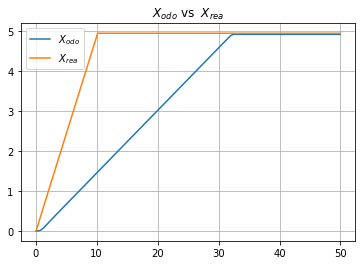

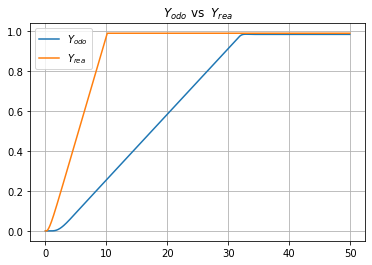

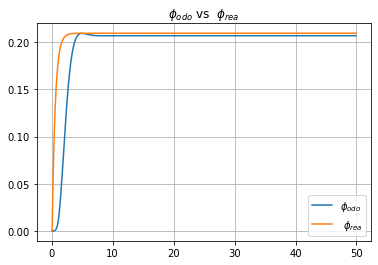

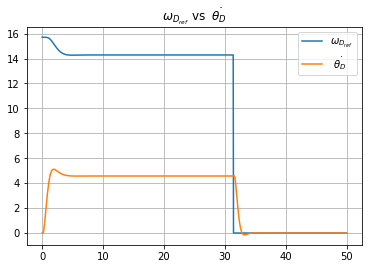

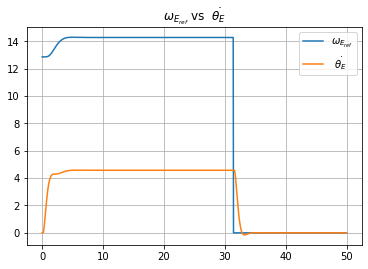

In [ ]:
tf = 50.00
dt = 0.05
t = np.arange(0,tf,dt)

#Parametros do robo
u=0.1
w=0.85
R2=0.035
L2=0.28

xd=5
yd=1

u0 = 0.5

#Parametros do motor
Ke = Kt = 0.01
J = 0.01
b = 0.019
R = 1
L = 0.5

#parametros do PID
Kp_g=1.8
Kp_g2=1.8
Kp=0.9
Ki=0.0
Kd=0
V_bat=12
V_d= 0.0
V_e= 0.0
erro_d=0.0
erro_e=0.0
erro_old_d=0
erro_old_e=0
erro_int_d=0
erro_int_e=0

Tp_d=np.zeros(np.size(t))
Tp_e=np.zeros(np.size(t))
Tpp_d=np.zeros(np.size(t))
Tpp_e=np.zeros(np.size(t))
i_d=np.zeros(np.size(t))
i_e=np.zeros(np.size(t))
ip_d=np.zeros(np.size(t))
ip_e=np.zeros(np.size(t))
sp_v_d=Sp_d*np.ones(np.size(t))
sp_v_e=Sp_e*np.ones(np.size(t))
wd=np.zeros(np.size(t))
we=np.zeros(np.size(t))


x_o=np.zeros(np.size(t))
x_r=np.zeros(np.size(t))
xp_o=np.zeros(np.size(t))
xp_r=np.zeros(np.size(t))
y_o=np.zeros(np.size(t))
y_r=np.zeros(np.size(t))
yp_o=np.zeros(np.size(t))
yp_r=np.zeros(np.size(t))
f_o=np.zeros(np.size(t))
f_r=np.zeros(np.size(t))
fp_o=np.zeros(np.size(t))
fp_r=np.zeros(np.size(t))


for k in range(0, (np.size(t)-1)):
    phid = np.arctan2(yd-y_o[k],xd-x_o[k])
    phid2 = np.arctan2(yd-y_r[k],xd-x_r[k])
    e = phid - f_o[k]
    e2 = phid2 - f_r[k]
    e =np.arctan2(np.sin(e), np.cos(e))
    e2 =np.arctan2(np.sin(e2), np.cos(e2))
    rho = np.sqrt((xd-x_o[k])**2 + (yd-y_o[k])**2)
    rho2 = np.sqrt((xd-x_r[k])**2 + (yd-y_r[k])**2)
    
    if rho < 0.2 :
        controle = False
        
    else:
        controle=True
    
    if controle:
        u = u0
        w = Kp_g * e
    else:
        u = 0.0
        w = 0.0

    if rho2 < 0.1 :
        controle2 = False
        
    else:
        controle2=True
    
    if controle2:
        u2 = u0
        w2 = Kp_g2 * e2
    else:
        u2 = 0.0
        w2 = 0.0
    wd[k]=(2*u+w*L2)/(2*R2)
    we[k]=(2*u-w*L2)/(2*R2)
    erro_d=wd[k]-Tp_d[k]
    erro_e=we[k]-Tp_e[k]
    V_d=erro_d*Kp+erro_int_d*Ki+((erro_d-erro_old_d)/dt)*Kd
    V_e=erro_e*Kp+erro_int_e*Ki+((erro_e-erro_old_e)/dt)*Kd
    erro_old_d=erro_d
    erro_old_e=erro_e
    erro_int_d+=erro_d*dt
    erro_int_e+=erro_e*dt
    if V_d>V_bat:
        V_d=V_bat
    if V_e>V_bat:
        V_e=V_bat 
    Tpp_d[k+1]=(1/J)*(Ke*i_d[k]-b*Tp_d[k])
    Tpp_e[k+1]=(1/J)*(Ke*i_e[k]-b*Tp_e[k])
    Tp_d[k+1]=Tp_d[k]+Tpp_d[k]*dt
    Tp_e[k+1]=Tp_e[k]+Tpp_e[k]*dt
    
    ip_d[k+1]=(1/L)*(V_d-R*i_d[k]-Kt*Tp_d[k])
    ip_e[k+1]=(1/L)*(V_e-R*i_e[k]-Kt*Tp_e[k])
    i_d[k+1]=i_d[k]+ip_d[k]*dt
    i_e[k+1]=i_e[k]+ip_e[k]*dt
    
    
    

    #parte da odometria
    xp_o[k+1]=(R2/2)*(Tp_e[k]+Tp_d[k])*np.cos(f_o[k])
    yp_o[k+1]=(R2/2)*(Tp_e[k]+Tp_d[k])*np.sin(f_o[k])
    fp_o[k+1]=(R2/L2)*(Tp_d[k]-Tp_e[k])

    x_o[k+1]=x_o[k]+xp_o[k]*dt
    y_o[k+1]=y_o[k]+yp_o[k]*dt
    f_o[k+1]=f_o[k]+fp_o[k]*dt

    #modelo uniciclo
    xp_r[k+1]=u2*np.cos(f_r[k])
    yp_r[k+1]=u2*np.sin(f_r[k])
    fp_r[k+1]=w2

    x_r[k+1]=x_r[k]+xp_r[k]*dt
    y_r[k+1]=y_r[k]+yp_r[k]*dt
    f_r[k+1]=f_r[k]+fp_r[k]*dt


    



plt.plot(t,x_o,t,x_r )

plt.title('$X_{odo}$ vs $\; X_{rea}$')
plt.legend(['$X_{odo}$', '$X_{rea}$'])
plt.grid()
plt.figure()
plt.plot(t,y_o, t,y_r)
plt.title('$Y_{odo}$ vs $\; Y_{rea}$')
plt.legend(['$Y_{odo}$', '$Y_{rea}$'])
plt.grid()
plt.figure()
plt.plot(t,f_o, t,f_r)
plt.title('$\phi_{odo}$ vs $\; \phi_{rea}$')
plt.legend(['$\phi_{odo}$',' $\phi_{rea}$'])
plt.grid()
plt.figure()
plt.plot(t,wd, t,Tp_d)
plt.title('$\omega_{D_{ref}}$ vs $\; \dot{\\theta_{D}}$')
plt.legend(['$\omega_{D_{ref}}$',' $\dot{\\theta_{D}}$'])
plt.grid()
plt.figure()
plt.plot(t,we, t,Tp_e)
plt.title('$\omega_{E_{ref}}$ vs $\; \dot{\\theta_{E}}$')
plt.legend(['$\omega_{E_{ref}}$',' $\dot{\\theta_{E}}$'])
plt.grid()